# Class monoid of ideals of a numerical semigroup

In this notebook, we show how to make some computations in the class monoid of ideals of a numerical semigroup. The theory behind the implementations can be found in the paper *Apéry sets and the class monoid of ideals of a numerical semigroup* by L. Casabella, M. D'Anna and P. A. García-Sánchez.

We start by loading [`numericalsgps`](https://www.gap-system.org/Packages/numericalsgps.html), a [`GAP`](https://www.gap-system.org) package that allows to make computations with numerical and affine semigroups.

In [1]:
LoadPackage("num");

true

## Apéry lists

Apéry lists of ideals (with respect to the multiplicity of their ambient semigroups) and minimal generators can be computed as in the following example.

In [4]:
s:=NumericalSemigroup(5,7,9);;
i:=[0,2]+s;; 
AperyList(i);

[ 0, 11, 2, 18, 9 ]

In [5]:
MinimalGenerators(i);

[ 0, 2 ]

In [7]:
j:=[0,3,4]+s;;
AperyList(j);

[ 0, 11, 7, 3, 4 ]

In [8]:
AperyList(Union(i,j));

[ 0, 11, 2, 3, 4 ]

In [9]:
AperyList(Intersection(i,j));

[ 0, 11, 7, 18, 9 ]

Given a numerical semigroup $S$ with multiplicity $m$ and an $(m-1)$-tuple, the following function detects if the tuple corresponds to the Apéry set of an ideal of $S$.

In [10]:
isaperylistideal:=function(ap,s)
    local aps, m;
    if not(IsListOfIntegersNS(ap)) then
        return false;
    fi;

    if not(ForAll(ap, x->x>=0)) then    
        return false;
    fi;
    m:=Multiplicity(s);
    if Length(ap)<>m then
        return false;
    fi;

    aps:=AperyList(s);
    return ForAll(Cartesian([1..m],[1..m]), i-> ap[i[1]]+aps[i[2]] >= ap[1+(i[1]+i[2]-2) mod m]);
end;

function( ap, s ) ... end

## The ideal class monoid

With this, and making use of the Kunz coordinates of the numerical semigroup $S$, we can compute the set of ideals of $S$ whose minimum is zero, which is isomorphic to the class monoid of ideals of $S$. 

$$
\mathcal{I}_0(S) = \{I : I \text{ ideal of } S, \min(I)=0\}.
$$

In [11]:
I0:=function(s)
    local k, c, v, m;
    m:=Multiplicity(s);
    k:=Concatenation([0],KunzCoordinates(s));
    c:=Cartesian(List([1..m],i->[0..k[i]]));
    c:=Filtered(c, k->isaperylistideal(List([1..m],i->k[i]*m+i-1),s));
    v:=List(c, k->List([1..m],i->k[i]*m+i-1)+s);
    return v;
end;

function( s ) ... end

We know that for a numerical semigroup $S$ with multiplicity $m$ and genus $g$, $2^{m-1}+g-m+1\le |\mathcal{I}_0(S)|$. There are three numerical semigroups attaining this bound with genus 10. 

In [13]:
l:=NumericalSemigroupsWithGenus(10);;
List(Filtered(l,s->Length(I0(s))=2^(Multiplicity(s)-1)+10-Multiplicity
(s)+1), MinimalGenerators);

[ [ 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21 ], [ 10, 11, 12, 13, 14, 15, 16, 17, 18 ], [ 2, 21 ] ]

We can see obtain the Hasse diagram of $\mathcal{I}_0(S)$ with respect to inclusion in [`dot`](https://graphviz.org/doc/info/lang.html) with the following.

In [14]:
hasseI0:=function(s) 
    local  v,e, is;

    is:=I0(s);
    v:=List(is,MinimalGenerators);
    e:=Filtered(Cartesian(v,v), p->IsSubset(p[2]+s,p[1]+s));
    return DotBinaryRelation(HasseDiagramBinaryRelation(BinaryRelationByElements(Domain(v),List(e,Tuple))));
end;


function( s ) ... end

Let us see an example.

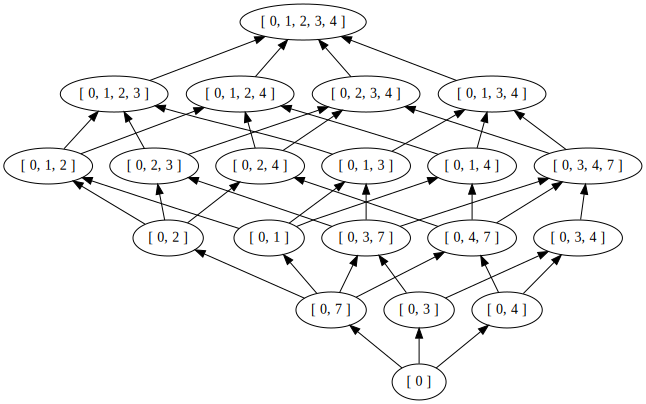

In [17]:
s:=NumericalSemigroup(5,6,8,9);;
h:=hasseI0(s);;
JupyterSplashDot(h);

## Irreducibles, atoms, quarks, primes

Given two ideals $I$ and $J$ in $\mathcal{I}_0(S)$, we write $I\preceq J$ if there exits another ideal $K$ in $\mathcal{I}_0(S)$ such that $I+K=J$.

In [18]:
leadd:=function(i,j,ids)
    local cand;
    if not(IsSubset(j,i)) then
        return(false);
    fi;
    cand:=Filtered(ids,k->IsSubset(j,k));
    return ForAny(cand, k->j=i+k);
end;

function( i, j, ids ) ... end

Let us find the set of irreducibles of $(\mathcal{I}_0(S),+)$ (with respect to $\preceq$).

In [19]:
irredsI0:=function(s)
    local is, isnz;
    is:=I0(s);;
    isnz:=Difference(is,[0+s]);;
    return Filtered(isnz,i->Filtered(Cartesian(isnz,isnz), p->i<>p[1] and i<>p[2] and i=p[1]+p[2])=[]);
end;

function( s ) ... end

In [20]:
List(irredsI0(s),MinimalGenerators);

[ [ 0, 1, 3 ], [ 0, 1 ], [ 0, 2 ], [ 0, 3, 4 ], [ 0, 3 ], [ 0, 4 ], [ 0, 7 ] ]

And the set of atoms.

In [21]:
atomsI0:=function(s)
    local is, isnz;
    is:=I0(s);;
    isnz:=Difference(is,[0+s]);;
    return Filtered(isnz,i->Filtered(Cartesian(isnz,isnz), p->i=p[1]+p[2])=[]);
end;

function( s ) ... end

In [22]:
List(atomsI0(s),MinimalGenerators);

[ [ 0, 3, 4 ] ]

... quarks

In [23]:
quarksI0:=function(s)
    local is, isnz;
    is:=I0(s);;
    isnz:=Difference(is,[0+s]);;
    return Filtered(isnz,i->Filtered(isnz,j->i<>j and IsSubset(i,j) and leadd(j,i,isnz))=[]);
end;

function( s ) ... end

In [24]:
List(quarksI0(s), MinimalGenerators);

[ [ 0, 3, 4 ], [ 0, 3 ], [ 0, 4 ], [ 0, 7 ] ]

Or 

In [25]:
quarksI0:=function(s)
    local is, isnz, c, p, cand, i;
    is:=I0(s);;
    isnz:=Difference(is,[0+s]);;
    c:=IteratorOfCartesianProduct(isnz,isnz);
    cand:=ShallowCopy(isnz);
    for p in c do
        i:=p[1]+p[2];
        if p[1]<>i then 
            RemoveSet(cand,i);
        fi;
    od;
    return cand;
end;

function( s ) ... end

In [26]:
List(quarksI0(s), MinimalGenerators);

[ [ 0, 3, 4 ], [ 0, 3 ], [ 0, 4 ], [ 0, 7 ] ]

and finally the set of prime elements

In [27]:
primesI0:=function(s)
    local is, isnz,irr,ci;
    is:=I0(s);;
    isnz:=Difference(is,[0+s]);;
    irr:=Filtered(isnz,i->Filtered(Cartesian(isnz,isnz), p->i<>p[1] and i<>p[2] and i=p[1]+p[2])=[]);
    ci:=Cartesian(isnz,isnz);
    return Filtered(irr,a->ForAll(Filtered(ci, p->leadd(a,p[1]+p[2],is)), p->leadd(a,p[1],is) or leadd(a,p[2],is)));
end;

function( s ) ... end

which in this case is empty:

In [28]:
primesI0(s);

[  ]

Let us see how we can depict the Hasse diagram of the ideal class monoid of a semigroup with respect to $\preceq$ (or any other ordering induced by a binary operation).

In [29]:
hasseI0op:=function(s,op)
    local  v,e, is;

    is:=I0(s);
    v:=List(is,MinimalGenerators);
    e:=Filtered(Cartesian(v,v), p->ForAny(v, a->(p[2]+s)=op(p[1]+s,a+s)));
    return DotBinaryRelation(HasseDiagramBinaryRelation(BinaryRelationByElements(Domain(v),List(e,Tuple))));
end;

function( s, op ) ... end

In [30]:
s:=NumericalSemigroup(4,6,9);;

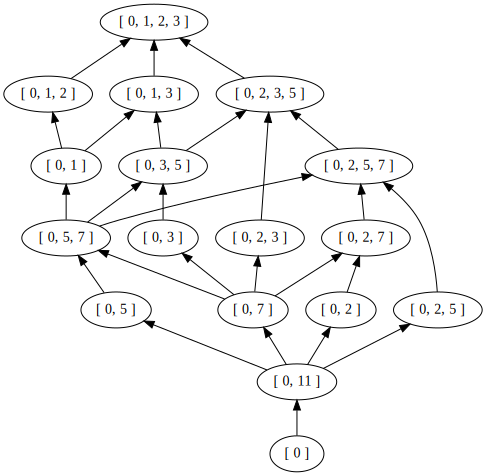

In [31]:
JupyterSplashDot(hasseI0op(s,\+));

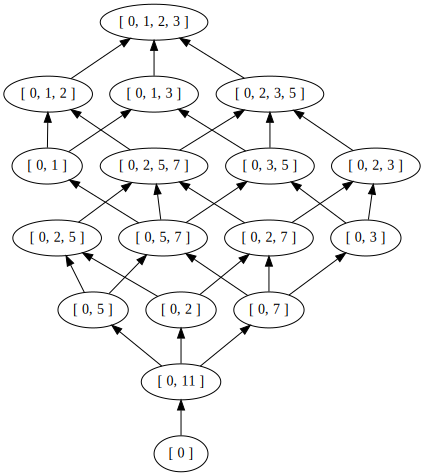

In [32]:
JupyterSplashDot(hasseI0(s));

In [33]:
s:=NumericalSemigroup(3,5,7);;

In [34]:
IsIrreducible(s);

true

In [35]:
List(primesI0(s),MinimalGenerators);

[ [ 0, 1 ] ]

In [36]:
List(quarksI0(s),MinimalGenerators);

[ [ 0, 2 ], [ 0, 4 ] ]

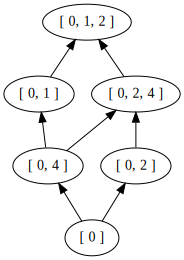

In [37]:
JupyterSplashDot(hasseI0(s));

In [51]:
s:=NumericalSemigroup(4,6,9);;

In [52]:
List(primesI0(s),MinimalGenerators);

[ [ 0, 1 ], [ 0, 11 ] ]

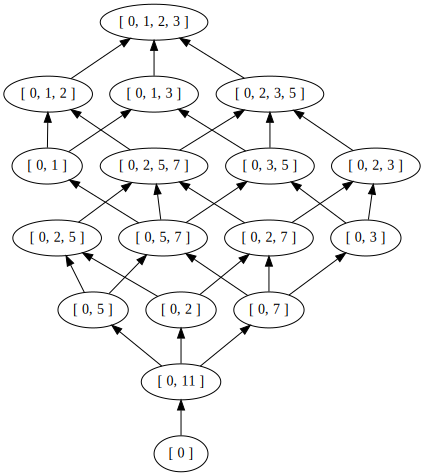

In [53]:
JupyterSplashDot(hasseI0(s));

Oversemigroups correspond with idempotent ideals.

In [58]:
os:=OverSemigroups(s);;
Set(List(List(os,s->AperyList(s,4)),ap->ap+s),MinimalGenerators);

[ [ 0 ], [ 0, 1, 2, 3 ], [ 0, 2 ], [ 0, 2, 3, 5 ], [ 0, 2, 5, 7 ], [ 0, 2, 7 ], [ 0, 3 ], [ 0, 3, 5 ], [ 0, 5 ], [ 0, 5, 7 ], [ 0, 7 ], [ 0, 11 ] ]

In [59]:
Set(Filtered(I0(s),i->i+i=i),MinimalGenerators);

[ [ 0 ], [ 0, 1, 2, 3 ], [ 0, 2 ], [ 0, 2, 3, 5 ], [ 0, 2, 5, 7 ], [ 0, 2, 7 ], [ 0, 3 ], [ 0, 3, 5 ], [ 0, 5 ], [ 0, 5, 7 ], [ 0, 7 ], [ 0, 11 ] ]

## Decomposition into irreducibles

Let us take advantage of the Kunz coordinates to write a function that for a given ideal $I$ of $S$, finds all possible expressions of the form $I=J+K$ with $J$ and $K$ ideals of $S$ different from $I$. The output will be the Apéry sets of the possible $J$ and $K$.

In [41]:
decompose_proper:=function(i)
    local s, ap, m, k, c, kc;
    s:=AmbientNumericalSemigroupOfIdeal(i);
    kc:=Concatenation([0],KunzCoordinates(s));
    m:=Multiplicity(s);
    ap:=AperyList(i,m);    
    k:=List([1..m], i-> (ap[i]-(i-1))/m);
    c:=Cartesian(List([1..m],i->[k[i]..kc[i]]));
    c:=Filtered(c, k->isaperylistideal(List([1..m],i->k[i]*m+i-1),s));
    c:=Difference(List(c, k->List([1..m],i->k[i]*m+i-1)), [ap,AperyList(s)]);
    c:=Filtered(Cartesian(c,c), a-> (a[1]+s)+(a[2]+s)=i);
    return c;
end;

function( i ) ... end

With this, we can recurrently decompose $I$ as a sum of irreducibles (the output will be lists of Apéry sets of irreducible ideals).

In [42]:
factorizations_irr:=function(i)
    local lsp, fs, f, p, irs, sp, q,s;

    s:=AmbientNumericalSemigroupOfIdeal(i);
    lsp:=decompose_proper(i);
    if lsp=[] then 
        return [[AperyList(i)]];
    fi;
    irs:=[];
    fs:=[];
    while lsp<>[] do
        f:=lsp[1];
        p:=First(f,a->not(a in irs));
        if p=fail then
            Remove(lsp,1);
            AddSet(fs,SortedList(f));
            # Print("new factorization ",f,"\n");
        else
            sp:=decompose_proper(p+s);
            if sp=[] then
                Add(irs,p);
                # Print("new irreducible ",p,"\n");
            else 
                Remove(lsp,1);
                Remove(f,Position(f,p));
                for q in sp do
                    Add(lsp,Concatenation(f,q));
                od;
            fi;
        fi;
    od;
    return fs;
end;

function( i ) ... end

Let us see how this works with an example.

In [43]:
s:=NumericalSemigroup(3,5,7);;

In [44]:
i:=[0,4]+s;;

In [45]:
fs:=factorizations_irr(i);

[ [ [ 0, 4, 5 ] ] ]

This, in particular, means that $\{0,4\}+S$ is irreducible.

In [46]:
i:=[0,2,4]+s;;

In [47]:
fs:=factorizations_irr(i);

[ [ [ 0, 4, 5 ], [ 0, 7, 2 ] ], [ [ 0, 7, 2 ], [ 0, 7, 2 ] ] ]

In [48]:
List(fs,f->List(f,a->MinimalGenerators(a+s)));

[ [ [ 0, 4 ], [ 0, 2 ] ], [ [ 0, 2 ], [ 0, 2 ] ] ]

That is, $\{0,2,4\}+S$ has two different factorizations in terms of irreducibles of $\mathcal{I}_0(S)$: $\{0,2,4\}+S=(\{0,4\}+S)+(\{0,2\}+S)=(\{0,2\}+S)+(\{0,2\}+S)$.

In particular, all factorizations of $\{0,2,3\}+S$ have length two (two irreducibles are involved in each factorization).

In [50]:
is:=I0(s);;
for i in Difference(is,[0+s]) do
    Print(MinimalGenerators(i)," lengths of factorizations ",Set(factorizations_irr(i),Length),"\n");
od;

[ 0, 1, 2 ] lengths of factorizations [ 2, 3 ]
[ 0, 1 ] lengths of factorizations [ 1 ]
[ 0, 2, 4 ] lengths of factorizations [ 2 ]
[ 0, 2 ] lengths of factorizations [ 1 ]
[ 0, 4 ] lengths of factorizations [ 1 ]


In [75]:
s:=NumericalSemigroup(4,6,9);;
i:=[0,1,3]+s;;
fs:=factorizations_irr(i);;
List(fs,f->List(f,a->MinimalGenerators(a+s)));

[ [ [ 0, 1 ], [ 0, 5 ], [ 0, 3 ] ], [ [ 0, 1 ], [ 0, 5 ], [ 0, 3 ], [ 0, 7 ] ], [ [ 0, 1 ], [ 0, 3 ] ] ]